In [1]:
library(tidyverse)
library(cowplot)
library(patchwork)

library(dplyr)
library(tidyr)
library(purrr)
library(broom)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.1     
✔ ggplot2   3.4.4          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [2]:

# List of file paths
file_paths <- c("/home/jpm73279/genome_downloads/C4_markers/count_motifs/file.tsv")

# Read and combine the files
combined_data <- map_df(file_paths, ~read_tsv(.x), .id = "source_file") %>% 
    dplyr::mutate(region_id_unique = str_c(conserved_regions, unique_id, sep = "_"))


Rows: 1098 Columns: 46
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (46): X1, X2, X3, X4, locus, species_other, loci, gene_family, number, a...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# Assuming your data frame is named df
spread_wide_tf_counts <- pivot_longer(combined_data, 
                        cols = ARF:ms_CGTCGTCGT, 
                        names_to = "TF", 
                        values_to = "TF_value") %>% 
    dplyr::mutate(tf_count_binary = case_when(TF_value > 0 ~ 1, 
                                             TF_value == 0 ~ 0))


In [11]:
head(subset)

species,enzyme_location,conserved_regions,acr_class_type,TF,TF_value,gene_family
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Os,mesophyll,conserved,broadly_accessible,ARF,0,AlaAT
Os,mesophyll,conserved,broadly_accessible,AS2LOB,0,AlaAT
Os,mesophyll,conserved,broadly_accessible,BBRBPC,0,AlaAT
Os,mesophyll,conserved,broadly_accessible,BES1,0,AlaAT
Os,mesophyll,conserved,broadly_accessible,bHLH_TCP,0,AlaAT
Os,mesophyll,conserved,broadly_accessible,C2C2_Dof,1,AlaAT


In [23]:
unique(subset$TF_value)

[1] "0"  "1"  "7"  "8"  "17" "2"  "4"  "5"  "3"  "14" "6"  "10" "15" "9"  "13"
[16] "12" "11" "24" "21" "23" "19" "25" "16"

In [49]:

# colored_characters <- setNames(sapply(characters, assign_color), characters)
colored_characters <- c(
  ARF = '#8c564b',            # Brown
  AS2LOB = '#FFFFB3',         # Light Yellow
  BBRBPC = '#c11577',         # Deep Pink
  BES1 = '#6C8686',           # Slate Gray
  bHLH_TCP = '#A2A763',       # Olive Green
  C2C2_Dof = '#386CB0',       # Dark Blue
  C2C2_GATA = '#17becf',      # Cyan
  CAMTA = '#FFD92F',          # Yellow
  CPP = '#e377c2',            # Pink
  E2FDP = '#d87c6a',          # Soft Red
  "GARP_ARR-B" = '#D6EEBE',   # Light Green
  "GARP_G2-like" = '#5894D4', # Sky Blue
  HD = '#6AAD51',             # Green
  HD_PLINC = '#ffd460',       # Golden Yellow
  "HD-Zip_I_II" = '#CCCCCC',  # Light Gray
  "HD-Zip_IV" = '#DEA940',    # Orange
  HSF = '#7570B3',            # Lavender
  MADS_MIKC = '#84c5ff',      # Light Blue
  NAC = '#E7673B',            # Vermilion
  SBP = '#2ca02c',            # Dark Green
  WRKY = '#FB9A99',           # Soft Pink
  bs_DOF = '#34679A',         # Unchanged
  bs_CATG = '#34679A',        # Unchanged
  bs_GCCGCC = '#34679A',      # Unchanged
  ms_GACGA = '#CB3533',       # Unchanged
  ms_AGCTA = '#CB3533',       # Unchanged
  ms_GACA = '#CB3533',        # Unchanged
  ms_CGTCGTCGT = '#CB3533'    # Unchanged
)


`summarise()` has grouped output by 'species', 'enzyme_location',
'conserved_regions', 'acr_class_type', 'TF'. You can override using the
`.groups` argument.


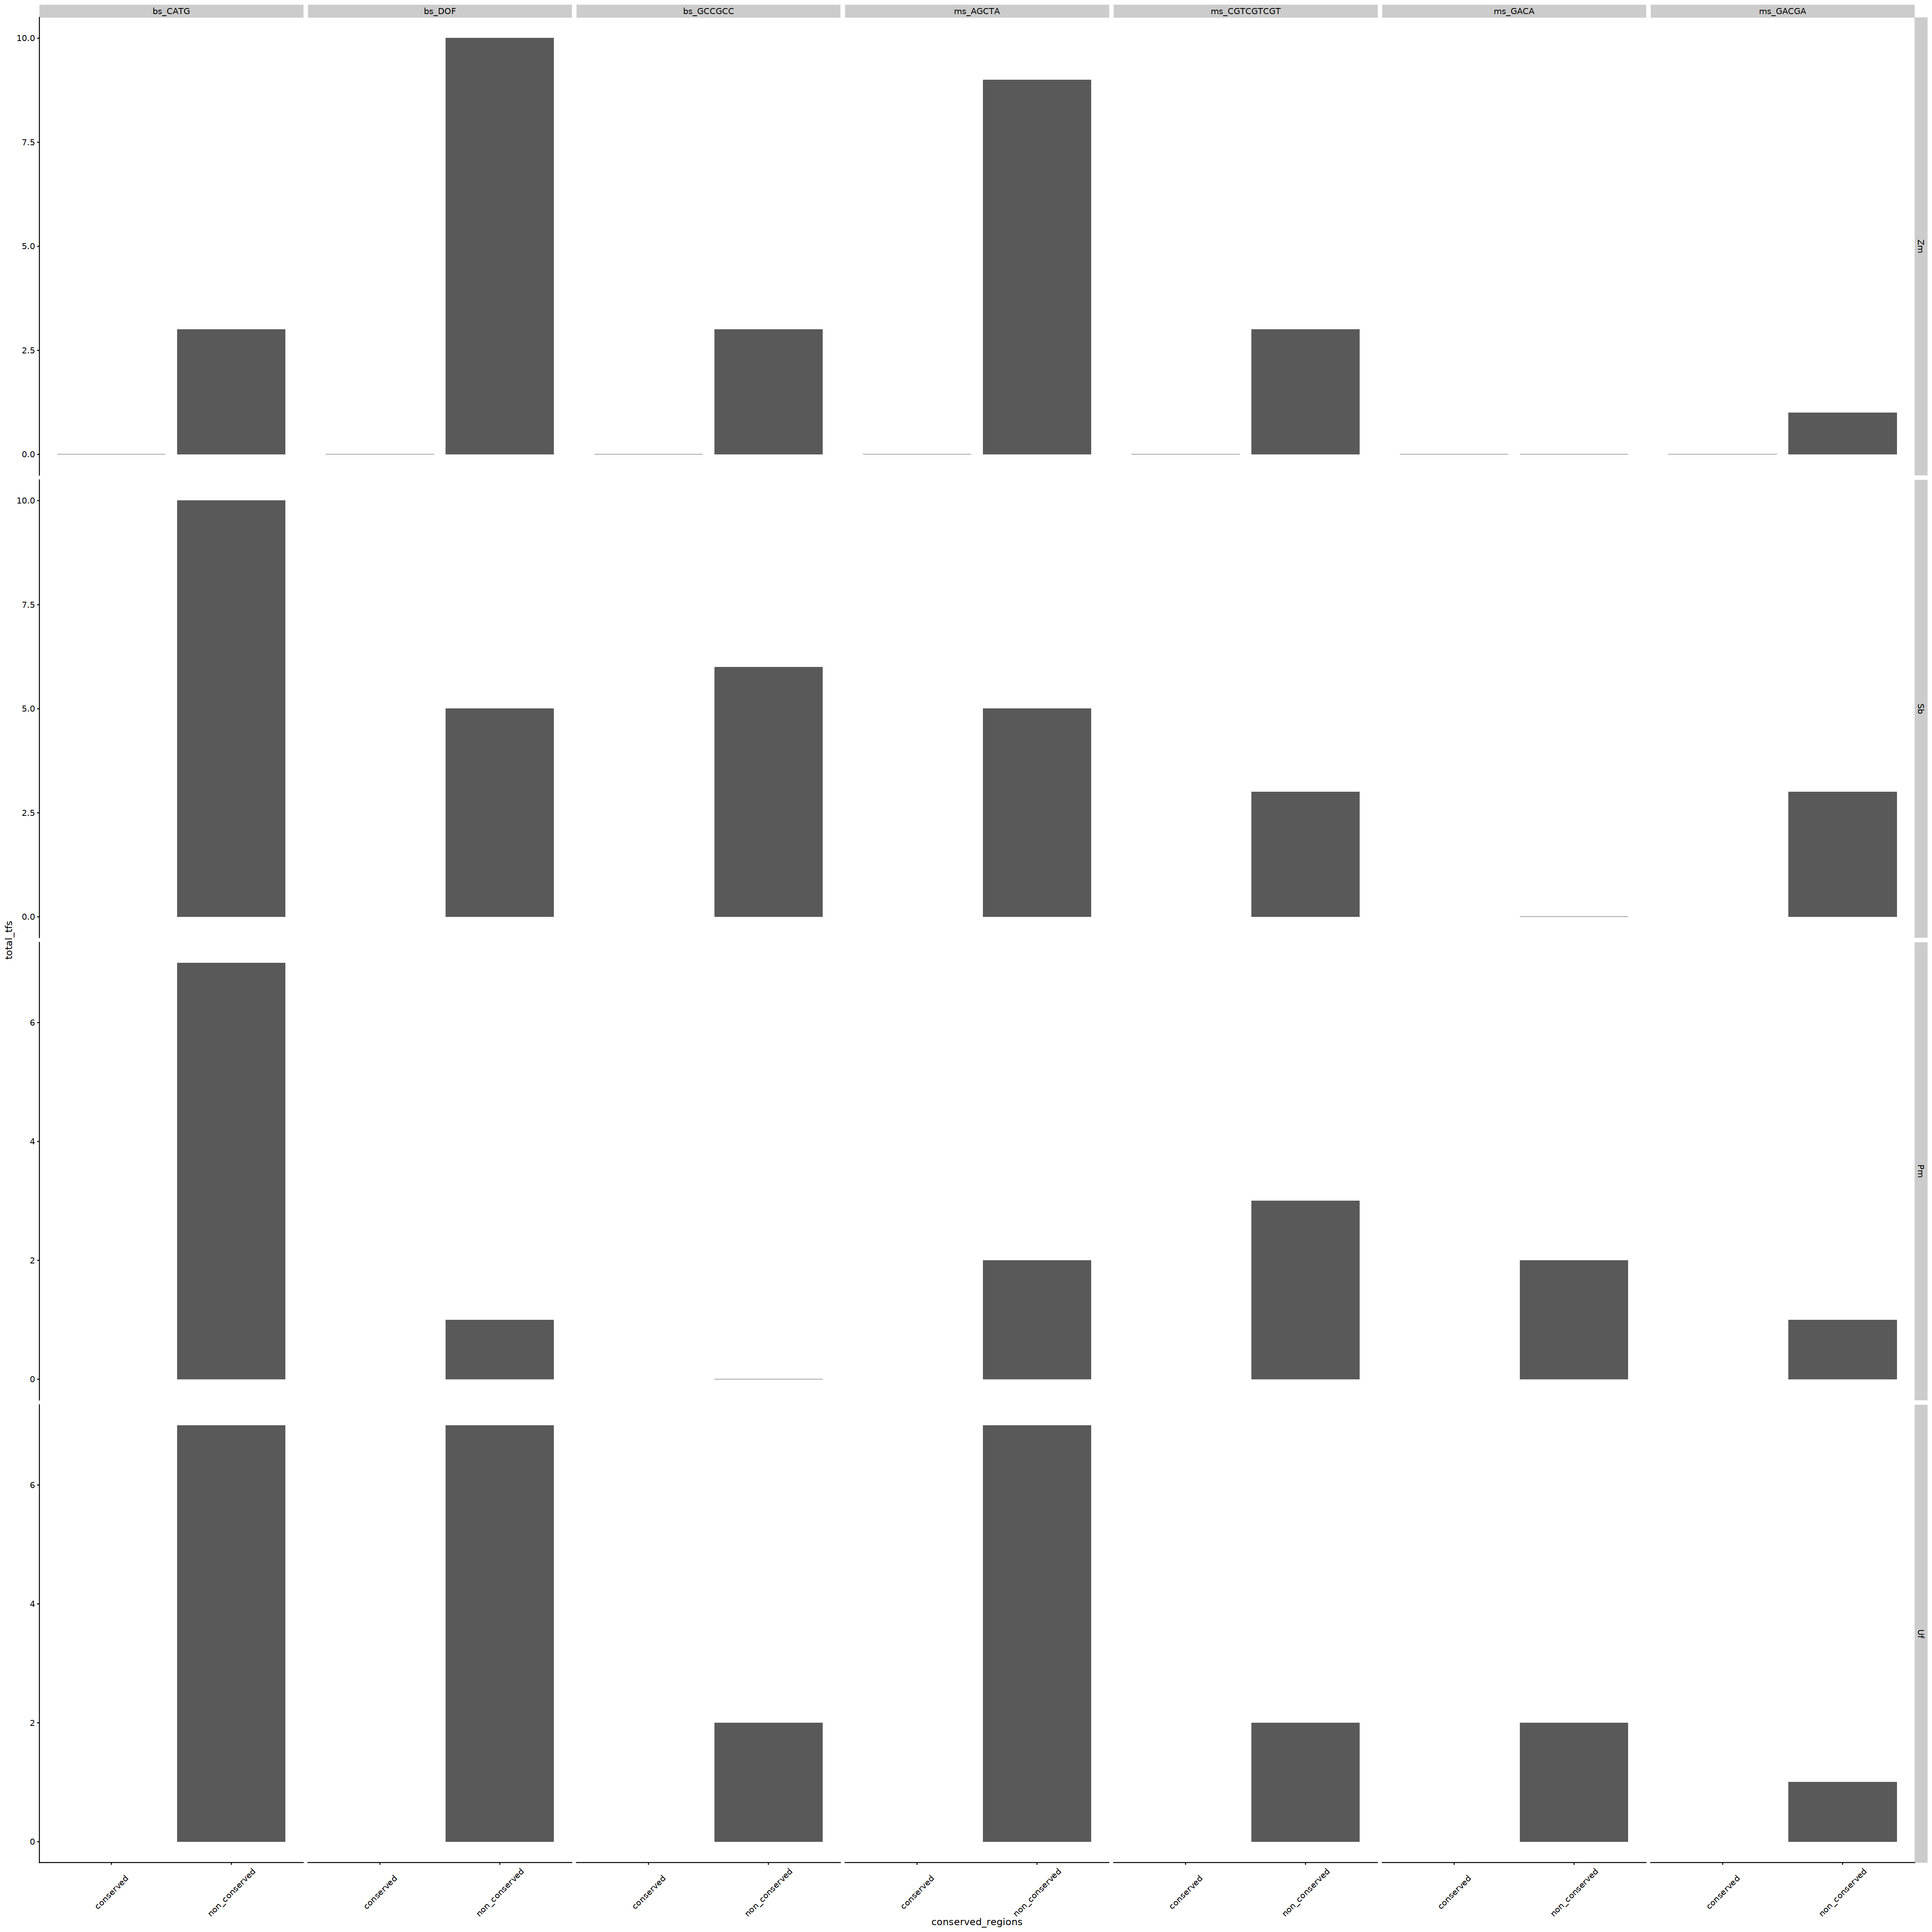

In [54]:
subset <- spread_wide_tf_counts %>% 
    dplyr::select(species, enzyme_location, conserved_regions, acr_class_type, TF, TF_value, gene_family) %>% 
    dplyr::filter(species != "species") %>% 
    dplyr::mutate(TF_value = as.numeric(TF_value))%>% 
    dplyr::group_by(species, enzyme_location, conserved_regions, acr_class_type, TF,gene_family) %>% 
    dplyr::summarise(total_tfs = sum(TF_value)) %>% 
    mutate(species = factor(species, levels = c("Zm", "Sb", "Pm", "Uf", "Os"))) %>%
    filter(str_starts(TF, "ms_") | str_starts(TF, "bs_")) 


options(repr.plot.width=40, repr.plot.height=40)
subset %>% 
    dplyr::filter(gene_family == "RCA") %>% 
    ggplot(., aes(x = conserved_regions, y = total_tfs)) + 
    geom_col() + 
    facet_grid(species ~ TF, scales = "free") +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.2)) +
    scale_fill_manual(values = colored_characters) + theme_cowplot() +
    theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) 


    
    

In [ ]:
unique(subset$gene_family)